In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

% matplotlib inline

In [2]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [3]:
def cost_func(X, y, theta, lambda_coeff):
    """Return value of cost function for logistic regression for given theta, using L2 regularization"""
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (1/m) * (-np.dot(y.T, np.log(h)) -np.dot((1-y).T, np.log(1-h))) \
                   + (lambda_coeff / (2*m)) * (np.sum(theta[1:]**2))   
    return cost

In [4]:
def feature_normalize(X):
    """Return normalized X, arrays of mean and standard deviations of columns in X"""
    mean = np.mean(X)
    std = np.std(X)
    X_norm = (X - mean)/std
    return X_norm, mean, std

In [5]:
def gradient_desc(X, y, theta, alpha, lambda_coeff, num_iters):
    """Implementation on algorithm of gradient descent for multiple number of features using L2 regularization"""
    m = len(y)
    cost_history = []
    for i in range(num_iters):
        h = sigmoid(np.dot(X, theta))
        reg_term = (alpha/m) * lambda_coeff * theta         
        temp = theta - (alpha/m) * np.dot(X.T, (h - y)) - reg_term
        temp[0] += reg_term[0]
        theta = temp
        cost_history.append(cost_func(X, y, theta, lambda_coeff))

    return theta, cost_history

In [6]:
def logistic_regression(X, y, alpha, lambda_coeff, num_iters):   
    """Return theta vector received from gradient descent, means and standart deviations of columns in X 
    and values of cost function on every iteration of gradient descent"""
    X, mean, std = feature_normalize(X)
    X.insert(0, 'zero_feature', 1)
    theta = np.zeros(len(X.columns))
    theta, cost_history = gradient_desc(X, y, theta, alpha, lambda_coeff, num_iters)
    
    return X, theta, mean, std, cost_history

# Logistic regression for data with one feature

In [7]:
# Datasets were taken from machine learning course of Andrew Ng 

df = pd.read_csv('ex2data1.txt', names = ['exam1', 'exam2', 'admittion'])

X = df[df.columns[:-1]]
y = df[df.columns[-1]]
positive = df[df.admittion == 1]
negative = df[df.admittion == 0]
df.head()

,exam1,exam2,admittion
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Theta:  [ 1.00144658  2.2831278   2.08994717]


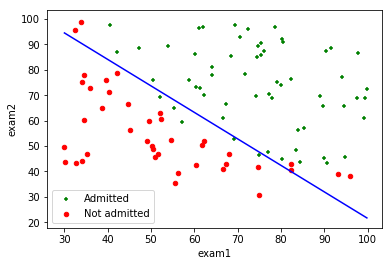

In [8]:
ax = positive.plot(kind='scatter', x='exam1', y='exam2',marker='+', c='g', label='Admitted')
negative.plot(kind='scatter', x='exam1', y='exam2',marker='o', c='r', label='Not admitted', ax=ax)

alpha=0.1
num_iters=2000
lambda_coeff=1

X_new, theta, mean, std, cost_history = logistic_regression(X, y, alpha, lambda_coeff, num_iters)
h = sigmoid(np.dot(X_new, theta))
predict = h >= 0.5
print("Theta: ", theta)

# drawing decision boundary
# Only need 2 points to define a line, so choose two endpoints from x axis
x1_vector = np.array([X['exam1'].min(), X['exam1'].max()])
#normalise points
x1_norm = (x1_vector - mean[0])/ std[0]
#using equation theta0 + theta1*x1+theta2*x2 = 0, find x2
x2_norm = (-1/theta[2])*(theta[1]*x1_norm + theta[0])
#renormalize this vector to build graph
x2_vector = x2_norm * std[1] + mean[1] 
plt.plot(x1_vector, x2_vector, color = 'b')

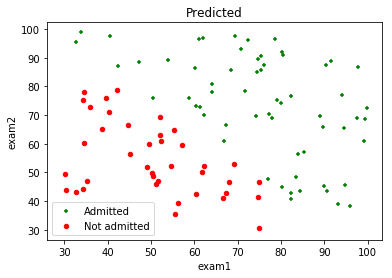

In [9]:
#predicted values
positive_pred = df[predict == 1]
negative_pred = df[predict == 0]
ax = positive_pred.plot(kind='scatter', x='exam1', y='exam2',marker='+', c='g', label='Admitted')
negative_pred.plot(kind='scatter', x='exam1', y='exam2',marker='o', c='r', label='Not admitted', ax=ax)
plt.title('Predicted')

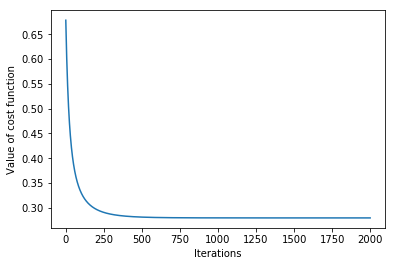

In [10]:
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Value of cost function')
plt.show()

# Comparing with sklearn

In [11]:
from sklearn import linear_model

X, mean, std = feature_normalize(X)
X.insert(0, 'zero_feature', 1)

regr = linear_model.LogisticRegression(penalty='l2', C=1)
regr.fit(X, y)
sklearn_pred = regr.predict(X)

# calculate number of dictinct predictions 
print('Number of dictinct predictions: ', sum(np.abs(sklearn_pred-predict)))
#print(np.array(list(map(int,predict))))

Number of dictinct predictions:  0


In [12]:
# calculate accuracy
print('Accuracy: ', 1 - sum(np.abs(y-predict))/len(y))

Accuracy:  0.89
